# **Luv Gupta**
## Twitter Sentiment Analysis

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [25]:
data_source_url = "https://raw.githubusercontent.com/kolaveridi/kaggle-Twitter-US-Airline-Sentiment-/master/Tweets.csv"
df = pd.read_csv(data_source_url)

In [26]:
df.head(3)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)


In [27]:
df.shape

(14640, 15)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [29]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [30]:
df.duplicated().sum()

36

In [31]:
df.airline_sentiment.value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

# CountPlot Of Airlinesentiment 

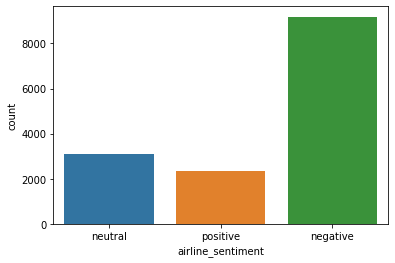

In [32]:
sns.countplot(x='airline_sentiment' , data=df);

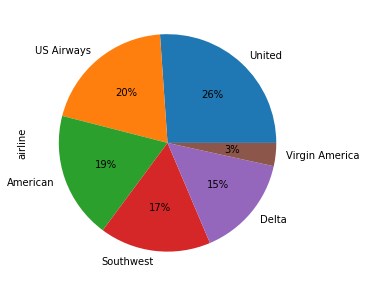

In [33]:
plt.figure(figsize=[5,5])
df.airline.value_counts().plot(kind='pie', autopct='%1.0f%%');

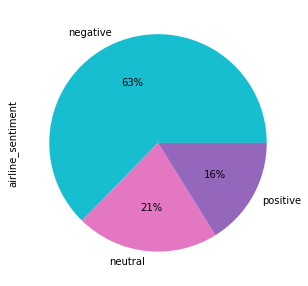

In [34]:
plt.figure(figsize=[5,5])
c=sns.color_palette()
df.airline_sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=[c[9],c[6],c[4]]);

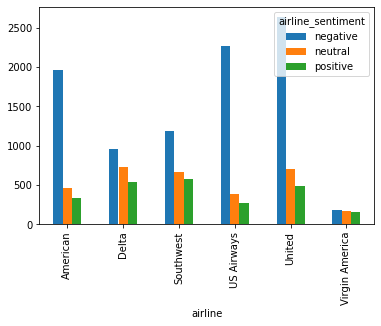

In [35]:
df.groupby(['airline', 'airline_sentiment']).airline_sentiment.count().unstack().plot(kind='bar');

## Dropping all other columns except Airline_Sentiment and text as rest have either many null values or of no use for the analysis

In [36]:
df=df[['airline_sentiment', 'text']]

# Changing column names to label and text

In [37]:
df.columns=["label", "text"]
df.head()

,label,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


# Text-Preprocessing
## Removing Punctuations,Stopwords and Lemmatizing 

In [38]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
wordnet=WordNetLemmatizer()
text_lemm = []
for i in range(0, len(df['text'])):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i]) #replace everything except a-z and A-Z with spaces
    review = review.lower()     # lowering each and every word
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    text_lemm.append(review)

In [39]:
df['text_lemm']=pd.Series(text_lemm)
df.head()

,label,text,text_lemm
0,neutral,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said
1,positive,@VirginAmerica plus you've added commercials t...,virginamerica plus added commercial experience...
2,neutral,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anothe...
3,negative,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...
4,negative,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing


## Balancing the number of targets

In [40]:
pos = df[df['label']=='positive']
neu = df[df['label']=='neutral']
df = pd.concat([df,neu,pos,neu,pos,pos])
df.shape

(27927, 3)

positive    9452
neutral     9297
negative    9178
Name: label, dtype: int64



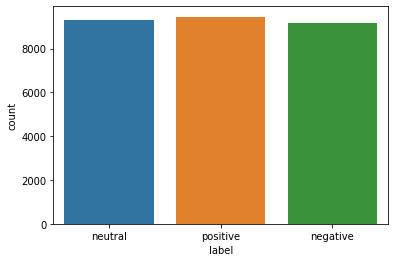

In [41]:
print(df.label.value_counts())
print()
sns.countplot(x='label',data=df);

In [42]:
#Bag of words
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
X=vect.fit_transform(df.text_lemm)
#print(sorted(vect.vocabulary_))
print(X.shape)
print(X.toarray())

(27927, 12572)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [43]:
# term frequency–inverse document frequency
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()
tfidf_matrix = vect.fit_transform(df['text_lemm'])
#print(vect.get_feature_names())
print(tfidf_matrix.shape)
df1= pd.DataFrame(tfidf_matrix.toarray(), columns = vect.get_feature_names())
df1.head()

(27927, 12572)


,aa,aaaand,aaadvantage,aaalwayslate,aacustomerservice,aadavantage,aadelay,aadv,aadvantage,aafail,...,zvugmkjw,zwmuoon,zwzc,zxzn,zy,zygjs,zz,zza,zzkqwwbjz,zzps
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
#Label encoding of label column
from sklearn.preprocessing import LabelEncoder
df['encoded_label'] = LabelEncoder().fit_transform(df['label'])
df.head()

,label,text,text_lemm,encoded_label
0,neutral,@VirginAmerica What @dhepburn said.,virginamerica dhepburn said,1
1,positive,@VirginAmerica plus you've added commercials t...,virginamerica plus added commercial experience...,2
2,neutral,@VirginAmerica I didn't today... Must mean I n...,virginamerica today must mean need take anothe...,1
3,negative,@VirginAmerica it's really aggressive to blast...,virginamerica really aggressive blast obnoxiou...,0
4,negative,@VirginAmerica and it's a really big bad thing...,virginamerica really big bad thing,0


# Splitting the Dataset into Training and Test Set

In [45]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df1,df.encoded_label,test_size = 0.20 , random_state = 0)

# **Building Three Models :1-LinearSVC**
#                       2-**Logistic Regression**
#                       3-**RandomForestClassifier**

In [46]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

models={'svc':LinearSVC(),'logistic':LogisticRegression(),'random':RandomForestClassifier(n_estimators=200, random_state=0)}
for i in models:
  model=models[i]
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  
  print("{} accuracy score: {}%".format(i,round(accuracy_score(y_test,y_pred)*100,2)))
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test, y_pred))

svc accuracy score: 88.87%
[[1487  274   88]
 [ 117 1686   78]
 [  20   45 1791]]
              precision    recall  f1-score   support

           0       0.92      0.80      0.86      1849
           1       0.84      0.90      0.87      1881
           2       0.92      0.96      0.94      1856

    accuracy                           0.89      5586
   macro avg       0.89      0.89      0.89      5586
weighted avg       0.89      0.89      0.89      5586



c:\users\hp\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


logistic accuracy score: 84.64%
[[1473  292   84]
 [ 211 1563  107]
 [  51  113 1692]]
              precision    recall  f1-score   support

           0       0.85      0.80      0.82      1849
           1       0.79      0.83      0.81      1881
           2       0.90      0.91      0.91      1856

    accuracy                           0.85      5586
   macro avg       0.85      0.85      0.85      5586
weighted avg       0.85      0.85      0.85      5586

random accuracy score: 94.47%
[[1592  214   43]
 [  15 1838   28]
 [   0    9 1847]]
              precision    recall  f1-score   support

           0       0.99      0.86      0.92      1849
           1       0.89      0.98      0.93      1881
           2       0.96      1.00      0.98      1856

    accuracy                           0.94      5586
   macro avg       0.95      0.94      0.94      5586
weighted avg       0.95      0.94      0.94      5586



# Random Forest Classifier has got the highest f1 score 
